In [1]:
# step 1: import the libraries and upload the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
#below is a new package needed for this lab
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OneHotEncoder

import os

os.chdir("/Users/lexivanmetre/Desktop/Jan Term 2024/")


In [2]:
# open the dataset.csv file 
music = pd.read_csv('spotify_dataset.csv')
# inspect the types of each column
music.dtypes


Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [3]:
music = music[(music['track_genre'] == 'country') |  (music['track_genre'] == 'disney') | (music['track_genre'] == 'hip-hop') | (music['track_genre'] == 'pop') | (music['track_genre'] == 'rock') | (music['track_genre'] == 'blues')]

In [4]:
# check how many nas 
music.isna().sum()
# not too many nas, so we can drop them 
df = music.dropna()

In [5]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8000,8000,5MAK1nd8R6PWnle1Q1WJvh,Everybody Loves an Outlaw,I See Red,I See Red,77,230613,False,0.509,0.448,...,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,blues
8001,8001,2tznHmp70DxMyr2XhWLOW0,Cage The Elephant,Melophobia,Cigarette Daydreams,79,208760,False,0.636,0.676,...,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,blues
8002,8002,7vguMCv8uVuZLiQJ156u3Z,Sam Tinnesz;Yacht Money,Play with Fire (feat. Yacht Money),Play with Fire (feat. Yacht Money),76,180690,False,0.573,0.539,...,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,blues
8003,8003,3dPQuX8Gs42Y7b454ybpMR,The White Stripes,Elephant,Seven Nation Army,84,232106,False,0.743,0.446,...,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,blues
8004,8004,6zC0mpGYwbNTpk9SKwh08f,Eric Clapton,Slowhand 35th Anniversary (Super Deluxe),Wonderful Tonight,76,225026,False,0.572,0.214,...,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,blues


<Axes: >

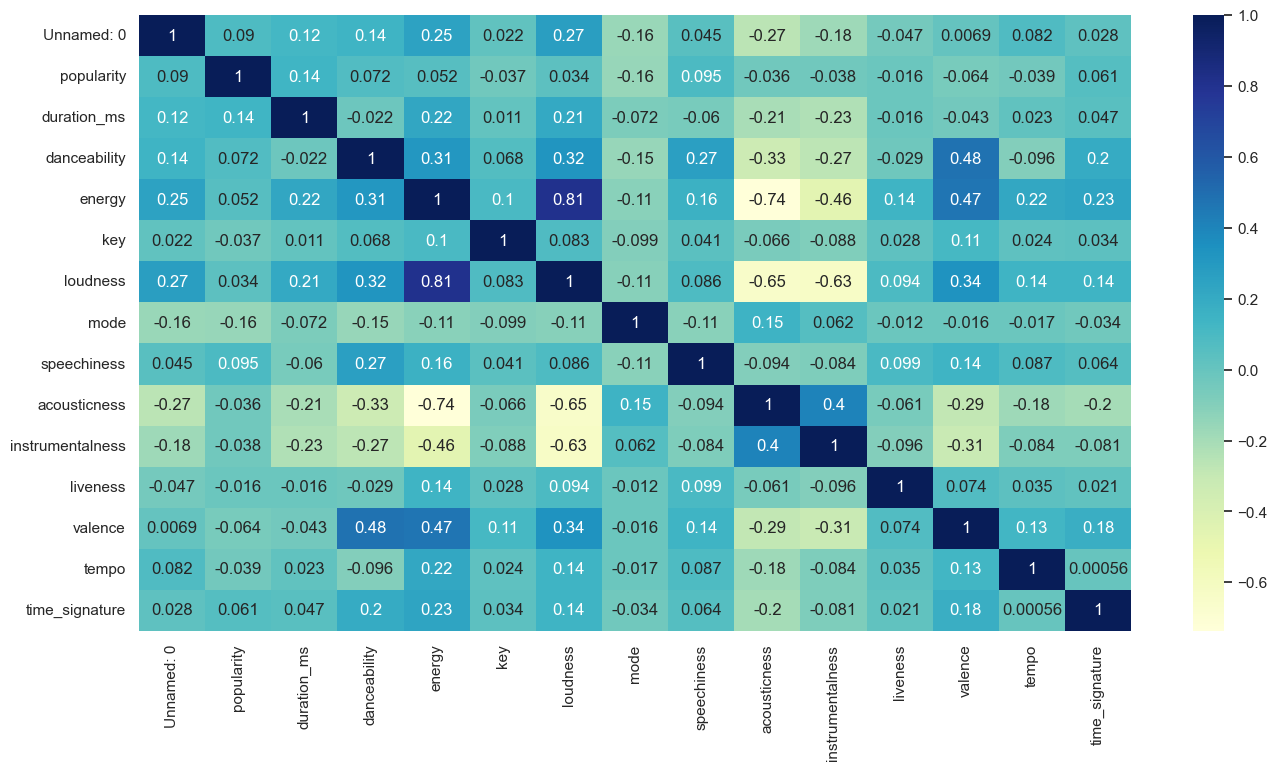

In [6]:
#Correlation
columns_to_drop = ['track_id','artists', 'album_name', 'track_name', 'explicit', 'track_genre']
dropped_music = music.drop(columns=columns_to_drop)
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr =dropped_music.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

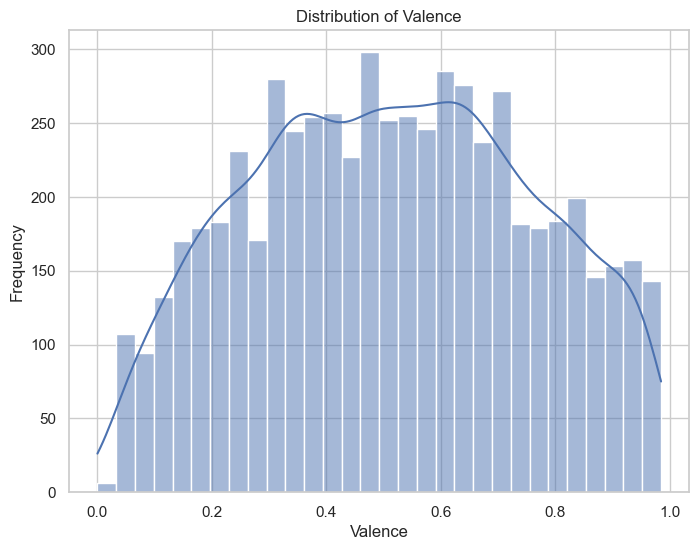

In [7]:
# Distribution of the target variable (danceability)
plt.figure(figsize=(8, 6))
sns.histplot(music["valence"], bins=30, kde=True)
plt.title("Distribution of Valence")
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.show()

                                 Numeric Features Distribution                                  


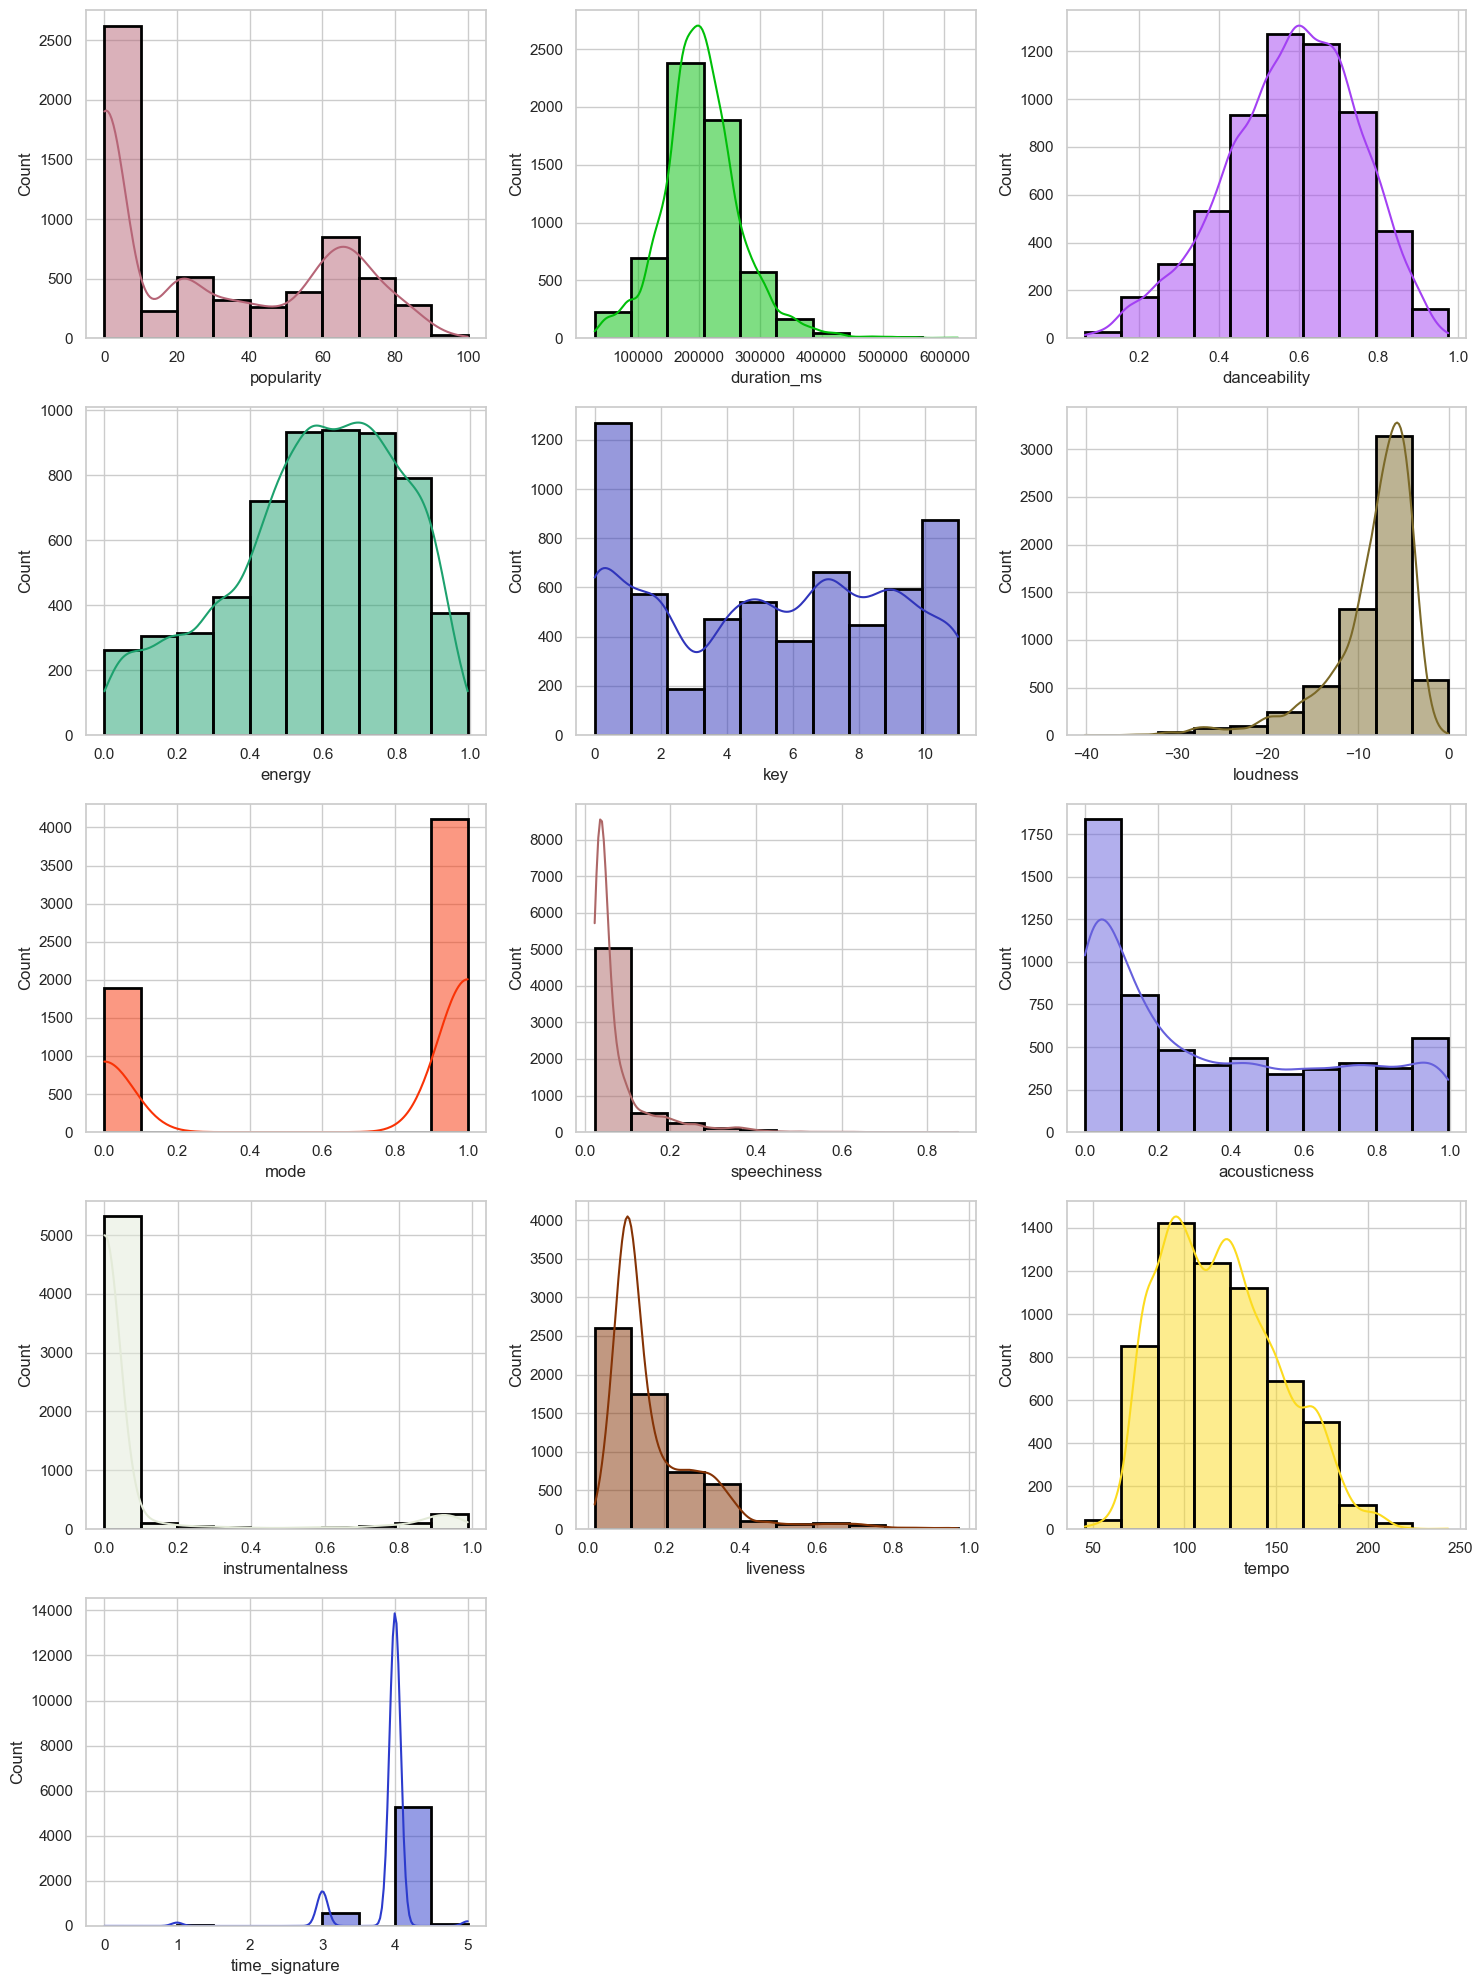

In [8]:
#Numeric Feature Distribution

import math


target_column = 'valence'
numerical_features = music.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(target_column)
# drop unnamed column
numerical_features = numerical_features.drop('Unnamed: 0')


print('\033[1mNumeric Features Distribution'.center(100))

# Define number of subplots per row
subplots_per_row = 3
num_rows = math.ceil(len(numerical_features) / subplots_per_row)

plt.figure(figsize=[15, 4 * num_rows])

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, subplots_per_row, i + 1)
    sns.histplot(
        music[feature],
        kde=True,  # Add a kernel density estimate
        color=list(np.random.randint([255, 255, 255]) / 255),
        edgecolor="black", 
        linewidth=2,
        bins=10
    )

plt.tight_layout()
plt.show()

# Clustering the Data

In [9]:
df.rename(columns={'track_genre': 'genre'}, inplace=True)

# Create a new 'mood' column based on the 'valence' column
df['mood'] = pd.cut(df['valence'], bins=[-float('inf'), 0.3, 0.7, float('inf')], labels=['Sad', 'NA', 'Happy'])

In [10]:
df.head(1900)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,mood
8000,8000,5MAK1nd8R6PWnle1Q1WJvh,Everybody Loves an Outlaw,I See Red,I See Red,77,230613,False,0.509,0.448,...,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,blues,Sad
8001,8001,2tznHmp70DxMyr2XhWLOW0,Cage The Elephant,Melophobia,Cigarette Daydreams,79,208760,False,0.636,0.676,...,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,blues,Sad
8002,8002,7vguMCv8uVuZLiQJ156u3Z,Sam Tinnesz;Yacht Money,Play with Fire (feat. Yacht Money),Play with Fire (feat. Yacht Money),76,180690,False,0.573,0.539,...,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,blues,NA
8003,8003,3dPQuX8Gs42Y7b454ybpMR,The White Stripes,Elephant,Seven Nation Army,84,232106,False,0.743,0.446,...,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,blues,Sad
8004,8004,6zC0mpGYwbNTpk9SKwh08f,Eric Clapton,Slowhand 35th Anniversary (Super Deluxe),Wonderful Tonight,76,225026,False,0.572,0.214,...,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,blues,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,19895,63UqEB9MMwqGdFqj2hRon2,High Valley,Laidback Country,I Be U Be,0,213093,False,0.442,0.746,...,1,0.0335,0.00740,0.000000,0.0996,0.415,126.035,4,country,NA
19896,19896,4VWH58O5XUjPRDcU3KBUUJ,High Valley,New Country,River's Still Running,0,189773,False,0.542,0.795,...,1,0.0262,0.02510,0.000000,0.1220,0.476,85.951,4,country,NA
19897,19897,5lG3i1d8SozygnpVfbEsAg,Byting,Byting,Huldersølv,43,164088,False,0.701,0.637,...,0,0.0265,0.24300,0.000000,0.0934,0.865,112.023,4,country,Happy
19898,19898,1a0ro0Q0fbLkGTMucWgFTb,Bailey Zimmerman,Change,Small Town Crazy,43,162352,False,0.502,0.877,...,1,0.0746,0.01290,0.000000,0.2440,0.696,170.123,4,country,NA


In [11]:
def create_cluster(df):
    # Create cluster groups based on mood and genre
    df['Cluster'] = 'NA'  # Initialize the 'Cluster' column with 'NA' for all rows
    
    # Cluster groups for "NA's"
    df.loc[(df['mood'] == 'NA') & (df['genre'] == 'blues'), 'Cluster'] = 0
    df.loc[(df['mood'] == 'NA') & (df['genre'] == 'country'), 'Cluster'] = 0
    df.loc[(df['mood'] == 'NA') & (df['genre'] == 'hip-hop'), 'Cluster'] = 0
    df.loc[(df['mood'] == 'NA') & (df['genre'] == 'disney'), 'Cluster'] = 0
    df.loc[(df['mood'] == 'NA') & (df['genre'] == 'pop'), 'Cluster'] = 0
    df.loc[(df['mood'] == 'NA') & (df['genre'] == 'rock'), 'Cluster'] = 0

    # Cluster groups for "Happy" mood
    df.loc[(df['mood'] == 'Happy') & (df['genre'] == 'blues'), 'Cluster'] = 1
    df.loc[(df['mood'] == 'Happy') & (df['genre'] == 'country'), 'Cluster'] = 2
    df.loc[(df['mood'] == 'Happy') & (df['genre'] == 'hip-hop'), 'Cluster'] = 3
    df.loc[(df['mood'] == 'Happy') & (df['genre'] == 'disney'), 'Cluster'] = 4
    df.loc[(df['mood'] == 'Happy') & (df['genre'] == 'pop'), 'Cluster'] = 5
    df.loc[(df['mood'] == 'Happy') & (df['genre'] == 'rock'), 'Cluster'] = 6
    
    # Cluster groups for "Sad" mood
    df.loc[(df['mood'] == 'Sad') & (df['genre'] == 'blues'), 'Cluster'] = 7
    df.loc[(df['mood'] == 'Sad') & (df['genre'] == 'country'), 'Cluster'] = 8
    df.loc[(df['mood'] == 'Sad') & (df['genre'] == 'hip-hop'), 'Cluster'] = 9
    df.loc[(df['mood'] == 'Sad') & (df['genre'] == 'disney'), 'Cluster'] = 10
    df.loc[(df['mood'] == 'Sad') & (df['genre'] == 'pop'), 'Cluster'] = 11
    df.loc[(df['mood'] == 'Sad') & (df['genre'] == 'rock'), 'Cluster'] = 12
    
    return df

In [12]:
create_cluster(df)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,mood,Cluster
8000,8000,5MAK1nd8R6PWnle1Q1WJvh,Everybody Loves an Outlaw,I See Red,I See Red,77,230613,False,0.509,0.448,...,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,blues,Sad,7
8001,8001,2tznHmp70DxMyr2XhWLOW0,Cage The Elephant,Melophobia,Cigarette Daydreams,79,208760,False,0.636,0.676,...,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,blues,Sad,7
8002,8002,7vguMCv8uVuZLiQJ156u3Z,Sam Tinnesz;Yacht Money,Play with Fire (feat. Yacht Money),Play with Fire (feat. Yacht Money),76,180690,False,0.573,0.539,...,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,blues,NA,0
8003,8003,3dPQuX8Gs42Y7b454ybpMR,The White Stripes,Elephant,Seven Nation Army,84,232106,False,0.743,0.446,...,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,blues,Sad,7
8004,8004,6zC0mpGYwbNTpk9SKwh08f,Eric Clapton,Slowhand 35th Anniversary (Super Deluxe),Wonderful Tonight,76,225026,False,0.572,0.214,...,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,blues,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,91995,5J5VBW8G9ViJfzX5FEYvni,Tom Petty and the Heartbreakers,Christmas Eve At Home,Christmas All Over Again,0,253626,False,0.440,0.838,...,0.0423,0.09560,0.000000,0.4730,0.619,138.908,4,rock,NA,0
91996,91996,5nQqnfHX5cr2FsGszRtTpr,Tom Petty and the Heartbreakers,Christmas Best Hits 2022,Christmas All Over Again,0,253626,False,0.440,0.838,...,0.0423,0.09560,0.000000,0.4730,0.619,138.908,4,rock,NA,0
91997,91997,0sL9GKpJKZRngHncF2r0Rg,Tom Petty and the Heartbreakers,Home At Christmas,Christmas All Over Again,0,253626,False,0.440,0.838,...,0.0423,0.09560,0.000000,0.4730,0.619,138.908,4,rock,NA,0
91998,91998,6S70OrI0CsYO0nD1l6qvDP,Tom Petty and the Heartbreakers,All I Want For Christmas Is You,Christmas All Over Again,0,253626,False,0.440,0.838,...,0.0423,0.09560,0.000000,0.4730,0.619,138.908,4,rock,NA,0


# Creating Our Song Recommendation Function 

In [13]:
# This function attemps to find the index of a given track name in the 'Track' column of the dataframe
def find_track_index(track, df):
    try:
        # Attempt to find the index of the first occurence of 'track_name' in the 'Track' column of 'df'
        track_index = df[df['track_name'] == track].index[0]
        # Return the index if found
        return track_index
    except IndexError:
        # If the track name is not found, return None
        return None

In [14]:
# This function finds song recommendations based on a given track name and the DataFrame 'df'
def find_song_recommendation(track, df):
    # Call the 'find_track_index' function to get the index of the provided 'track_name'
    track_index = find_track_index(track, df)
    # Retrieve the cluster label of the provided track using its index
    cluster = df.loc[track_index]['Cluster']
    # Create a filter to select rows in 'df' that belong to the same cluster as the provided track
    filter = (df['Cluster'] == cluster)
    # Apply the filter to 'df' to get a DataFrame containing songs from the same cluster
    filtered_df = df[filter]
    # Generate song recommendations by randomly selecting tracks from the same cluster
    for i in range(5):
        # Randomly sample a track from the shuffled DataFrame
        recommendation = filtered_df.sample()
        # Print the recommended track's title and artist
        print(recommendation.iloc[0]['track_name'] + ' by ' + recommendation.iloc[0]['artists'])

In [15]:
# TODO: Experiment with inputting different song names!
find_song_recommendation('Horse with No Rider - From "Tangled"/Score', df)

Poznajcie naszą rodzinę by Germaine Franco
You Can Close Your Eyes - Instrumental by Fred Mollin
Why Grumpy, You Do Care by Frank Churchill;Leigh Harline;Larry Morey
Zeige dich - Instrumental by Kristen Anderson-Lopez;Robert Lopez
Main Titles - The Little Mermaid - From "The Little Mermaid"/Score by Alan Menken;Disney


# Creating Our Song Randomizer Function

In [16]:
def find_random_song(track, df):
    # Call the 'find_track_index' function to get the index of the provided 'track_name'
    track_index = find_track_index(track, df)

    # Retrieve the cluster label of the provided track using its index
    cluster = df.loc[track_index]['Cluster']

    # Create a filter to select rows in 'df' that don't belong to the same cluster as the provided track
    filter = (df['Cluster'] != cluster)

    # Apply the filter to 'df' to get a DataFrame containing songs from different clusters
    filtered_df = df[filter]

    # Generate song recommendations by randomly selecting tracks from the filtered dataframe
    for i in range(5):
        # Randomly sample a track from the shuffled DataFrame
        random_song = filtered_df.sample()
        # Print the random song track's title and artist
        print(random_song.iloc[0]['track_name'] + ' by ' + random_song.iloc[0]['artists'])

In [17]:
# TODO: Experiment with inputting different song names!
find_random_song('Horse with No Rider - From "Tangled"/Score', df)

Dekha Hazaro Dafaa by Arijit Singh;Palak Muchhal;Jeet Gannguli
Knowing You by Kenny Chesney
Dance Macabre by Ghost
Surfin' U.S.A. - Remastered 2001 by The Beach Boys
Topsy Turvy - From "The Hunchback Of Notre Dame" / Soundtrack by Paul Kandel;Chorus - The Hunchback Of Notre Dame


# We will evaluate our model when we combine the Random Forest Analysis with the Song Chooser

# Evaluating the Model

In [18]:
# TODO: Insert the accuracies for each of the functions
recommendations_accuracy = []
random_songs_accuracy = []

recommendations_average = sum(recommendations_accuracy) / len(recommendations_accuracy)
random_songs_average = sum(random_songs_accuracy) / len(random_songs_accuracy)

print("Recommendations average accuracy:", recommendations_average)
print("Random songs average accuracy:", random_songs_average)

ZeroDivisionError: division by zero